In [1]:
#we need to import the necessary libraries that be required for our model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
 #we have read the file named “Corona_NLP_train” in CSV(comma-separated value) format. And have checked for the top 5 values in the dataset using head()
data = pd.read_csv("/content/Corona_NLP_train.csv",encoding='latin1')
df = pd.DataFrame(data)
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


<Axes: xlabel='Sentiment', ylabel='count'>

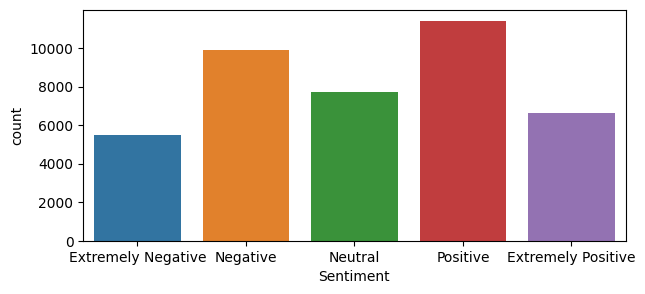

In [5]:
#Plot graph to see overview of data
plt.figure(figsize=(7,3))
sns.countplot(x='Sentiment', data=df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], )

In [6]:
#To see summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
#perform a regular expression function to remove any symbols and special characters, etc to get pure data.
reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in df["OriginalTweet"]:
  tweet.append(reg.sub(" ", i))
df = pd.concat([df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)

In [8]:
#Data after Cleaning
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Gahan https t co iFz9FAn2Pa and https ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the ou...


In [9]:
#convert text into the matrix of tokens, we have to import the following library and perform code.
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('english'))     # make a set of stopwords
vectoriser = TfidfVectorizer(stop_words=None)

In [10]:
#LabelEncoder is used for transforming categorical values into numerical values.

X_train = vectoriser.fit_transform(df["CleanedTweet"])
# Encoding the classes in numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(df['Sentiment'])
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [11]:
 #Let’s do all operations for test data also.

# importing the Test dataset for prediction and testing purposes
test_data = pd.read_csv("/content/Corona_NLP_test.csv",encoding='latin1')
test_df = pd.DataFrame(test_data)
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [13]:
reg1 = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in test_df["OriginalTweet"]:tweet.append(reg1.sub(" ", i))
test_df = pd.concat([test_df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,TRENDING New Yorkers encounter empty supermar...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,When I couldn t find hand sanitizer at Fred Me...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,Find out how you can protect yourself and love...
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,buying hits City as anxious shoppers stock...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,19 One week everyone...


In [14]:
#By using vectorization, we have performed normalization of test data and stored it into x_test & y_test. We have also predicted actual and predicted values.

X_test = vectoriser.transform(test_df["CleanedTweet"])
y_test = encoder.transform(test_df["Sentiment"])
# Prediction
y_pred = classifier.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,0,4
1,4,4
2,1,4
3,2,2
4,3,2


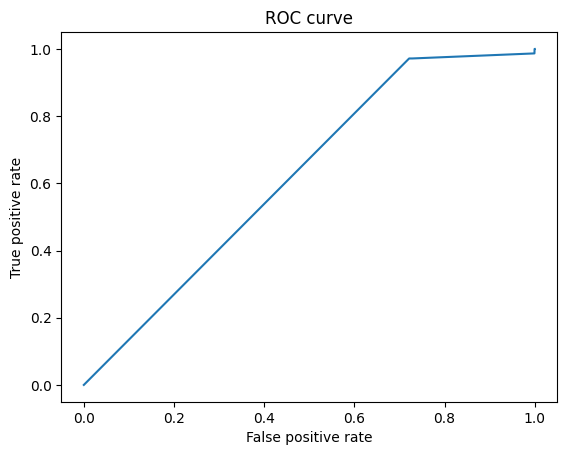

AUC of the predictions: 0.6231713165790018


In [15]:
#we have performed the accuracy of our model in the form of an AUC curve plotted using the matplotlib library.

from sklearn import metrics
# Generate the roc curve using scikit-learn.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
# Measure the area under the curve. The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

Here we got a score of AUC – 0.62 for the classifier (Naive Byes), we can say that the classifier (Naive Bayes) is not that so good but can acceptable. Since the more nearer to 1 AUC score, the classifier will be better.
